<a href="https://colab.research.google.com/github/BriniMohamedAyechi/Resumes_Classification_BERT/blob/main/Model_Test_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
!pip install PyPDF2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 1.4 MB/s eta 0:00:00


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Predicted class for '/content/drive/MyDrive/FineTuned BERTBERT_RESUME/T1.pdf': Valid
Predicted class for '/content/drive/MyDrive/FineTuned BERTBERT_RESUME/T2.pdf': Valid
Predicted class for '/content/drive/MyDrive/FineTuned BERTBERT_RESUME/T3.pdf': Valid
Predicted class for '/content/drive/MyDrive/FineTuned BERTBERT_RESUME/T4.pdf': Invalid
Predicted class for '/content/drive/MyDrive/FineTuned BERTBERT_RESUME/F1.pdf': Valid
Predicted class for '/content/drive/MyDrive/FineTuned BERTBERT_RESUME/F2.pdf': Invalid
Predicted class for '/content/drive/MyDrive/FineTuned BERTBERT_RESUME/F3.pdf': Invalid
Predicted class for '/content/drive/MyDrive/FineTuned BERTBERT_RESUME/F4.pdf': Invalid


Text(95.72222222222221, 0.5, 'Truth')

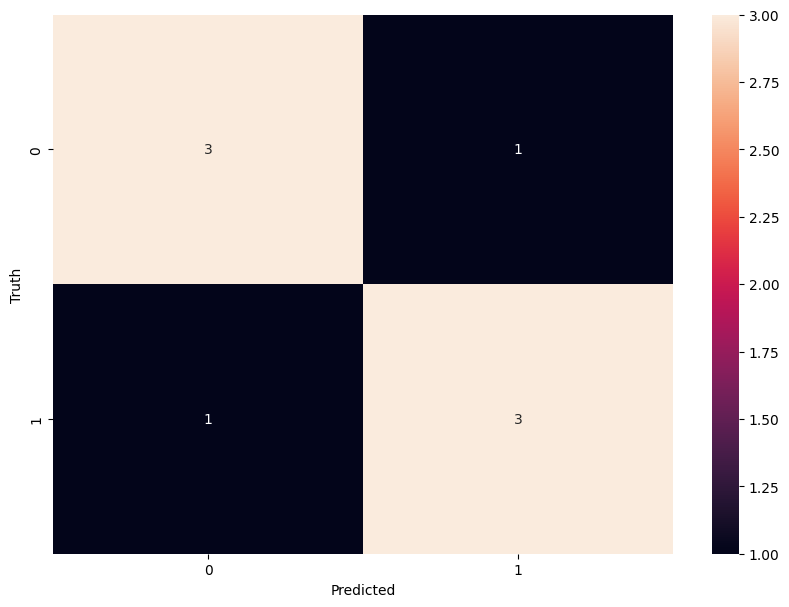

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from PyPDF2 import PdfReader
from sklearn.metrics import confusion_matrix
from google.colab import drive
from matplotlib import pyplot as plt
%matplotlib inline

# Mount Google Drive
drive.mount('/content/drive')

# Load the fine-tuned model and tokenizer from Google Drive
drive_path = '/content/drive/MyDrive/'
model_name = 'FineTuned BERTBERT_RESUME'

tokenizer = BertTokenizer.from_pretrained(drive_path + model_name)
model = BertForSequenceClassification.from_pretrained(drive_path + model_name)

def read_pdf_content(file_path):
    pdf_reader = PdfReader(file_path)
    pdf_text = ""
    for page in pdf_reader.pages:
        pdf_text += page.extract_text()
    return pdf_text

def evaluate_pdf(model, tokenizer, pdf_content):
    inputs = tokenizer.encode_plus(
        pdf_content,
        add_special_tokens=True,
        return_tensors='pt',
        padding=True,
        truncation=True,
        max_length=512
    )

    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']

    # Ensure the model is in evaluation mode
    model.eval()

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()

    # In your case, 'predicted_class' will indicate whether the PDF is valid (1) or invalid (0)
    return predicted_class

# List of PDF file paths to evaluate
pdf_file_paths = ['/content/drive/MyDrive/FineTuned BERTBERT_RESUME/T1.pdf',
                  '/content/drive/MyDrive/FineTuned BERTBERT_RESUME/T2.pdf',
                  '/content/drive/MyDrive/FineTuned BERTBERT_RESUME/T3.pdf',
                  '/content/drive/MyDrive/FineTuned BERTBERT_RESUME/T4.pdf',
                  '/content/drive/MyDrive/FineTuned BERTBERT_RESUME/F1.pdf',
                  '/content/drive/MyDrive/FineTuned BERTBERT_RESUME/F2.pdf',
                  '/content/drive/MyDrive/FineTuned BERTBERT_RESUME/F3.pdf',
                  '/content/drive/MyDrive/FineTuned BERTBERT_RESUME/F4.pdf'
                  ]

true_labels = [1, 1, 1, 1, 0, 0, 0, 0]  # Replace with the true class labels for each PDF in pdf_file_paths
predicted_labels = []

for pdf_file_path in pdf_file_paths:
    pdf_content = read_pdf_content(pdf_file_path)
    predicted_class = evaluate_pdf(model, tokenizer, pdf_content)
    predicted_labels.append(predicted_class)
    print(f"Predicted class for '{pdf_file_path}': {'Valid' if predicted_class == 1 else 'Invalid'}")

# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)


import seaborn as sn

plt.figure(figsize=(10,7)) # THIS CODE IS TO PRINT THE TRUTH MATRICS TO SEE HOW WELL UR MODEL IS
sn.heatmap(conf_matrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
